# Filtrado de imágenes

El filtrado de imágenes, en el contexto de la visión por computadora, se refiere a un proceso de modificar o mejorar una imagen aplicando un algoritmo específico o un conjunto de operaciones matemáticas a sus píxeles. El objetivo del filtrado de imágenes es manipular la imagen de tal manera que ciertas características se vuelvan más prominentes, lo que facilita la extracción de información relevante o la mejora de la calidad general de la imagen.
Los filtros de imagen suelen estar representados por una pequeña matriz o kernel, que se desliza sobre toda la imagen.

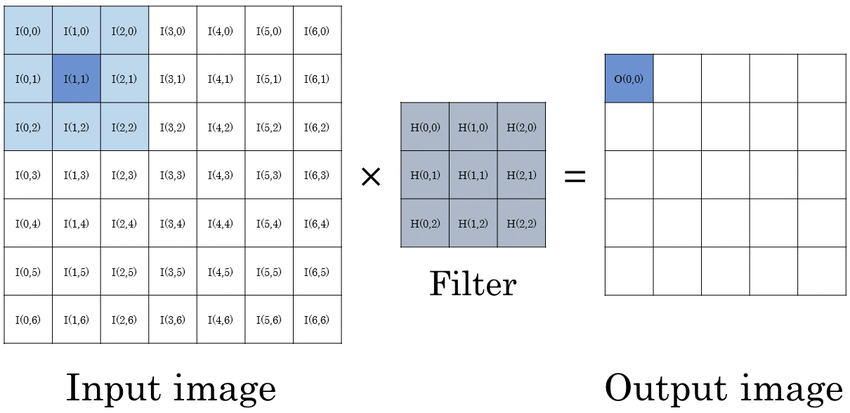

Para filtrado lineal, la respuesta  es dada por la suma de  productos de los coeficientes  del filtro y los correspondientes  pixeles directamente bajo el kernel. A esta operación se le conoce como convolución


En esencia, la convolución implica combinar dos funciones para producir una tercera función. En el procesamiento de imágenes, una de estas funciones es la imagen de entrada y la otra es una matriz más pequeña llamada núcleo o filtro. El kernel contiene valores numéricos que definen el comportamiento del filtro. El proceso implica deslizar el núcleo sobre la imagen, multiplicar sus valores con los valores de píxeles correspondientes en la imagen y resumir los resultados. Luego, esta suma se coloca en una ubicación específica de la imagen de salida..

En el contexto de la **convolución 1D**, nuestra entrada consta de una matriz unidimensional, a menudo denominada vector de características.

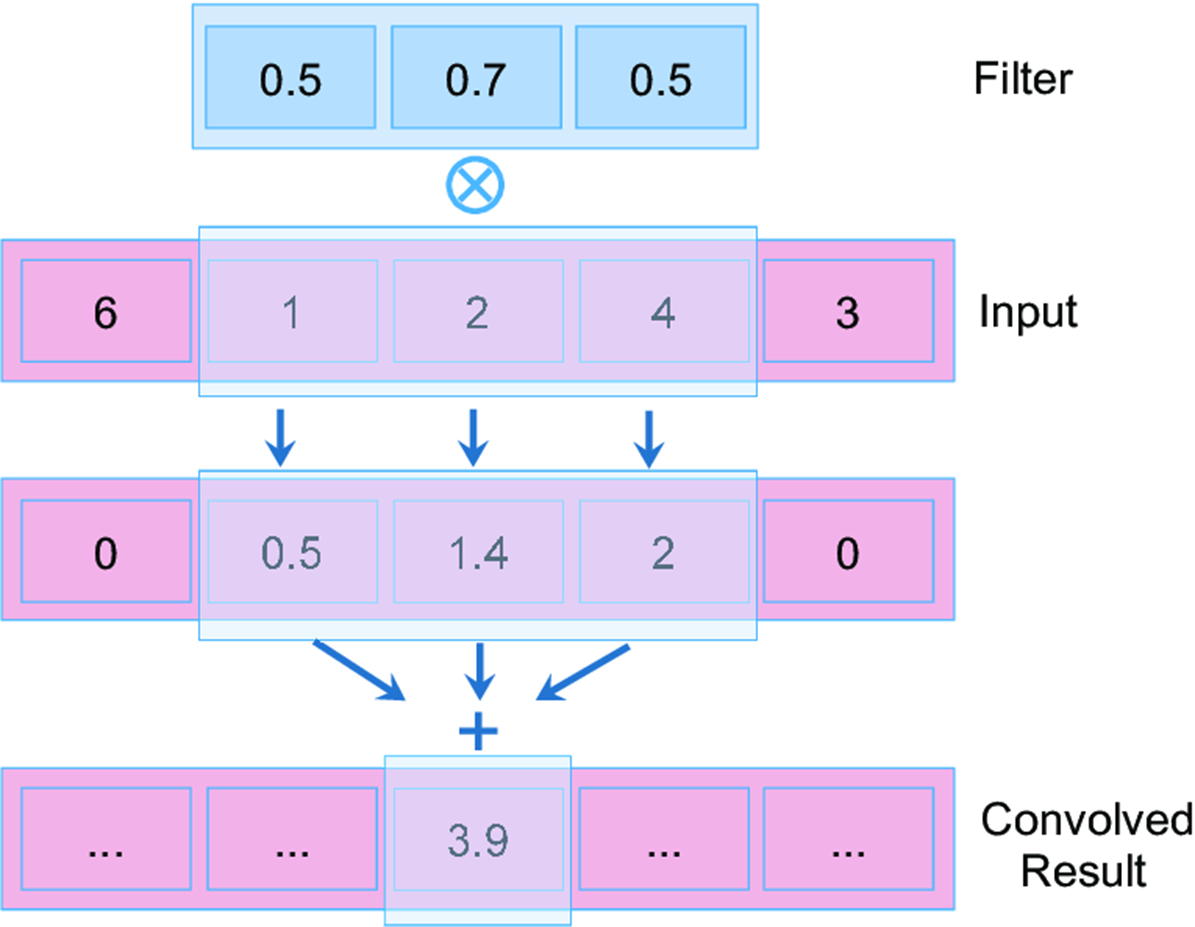

Si se observa esta operación hará que la salida sea más pequeña que la imagen original para eso se aplica padding o relleno que es agregar números a los extremos de la matriz original para que el kernel tenga con quien operarse y la imagen resultante sea del mismo tamaño de la otiginal

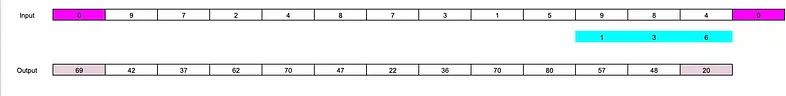

Para la convolución 2D el proceso es el mismo y coloco el resultado en donde estaría el centro del filtro al momento de la operación

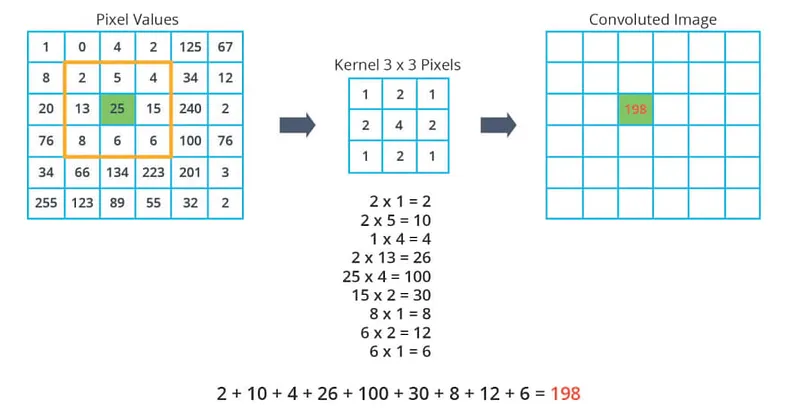

EJEMPLO: una imagen en escala de grises de 8 bits con una cuadrícula de 5x5. Los valores oscilan entre 0 y 255.

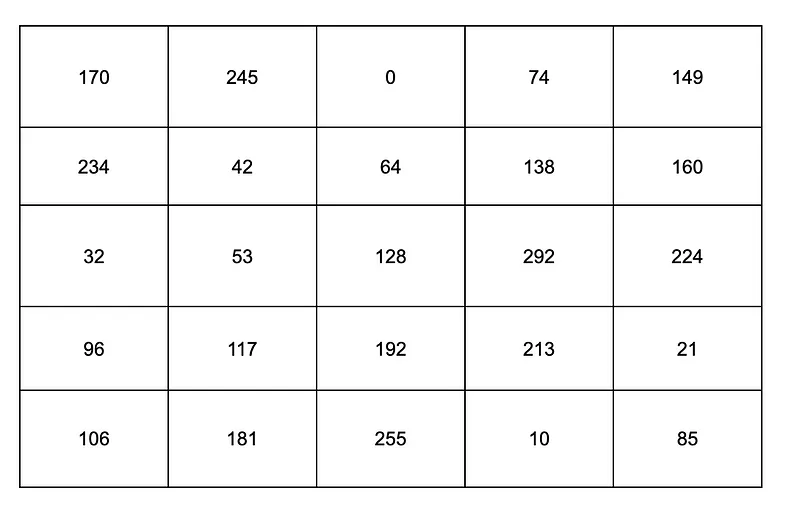

Y tenemos un kernel aleatorio de 3x3:


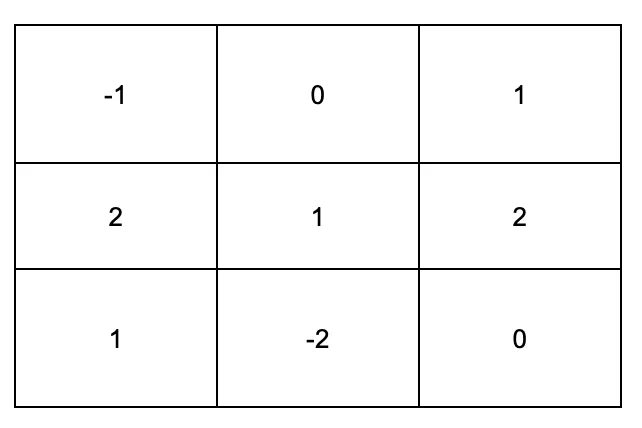

Cuando aplicamos el kernel a la entrada:

(-1*170)+(0*245)+(1*0)+(2*234)+(1*42)+(2*64)+(1*32)+(-2*53)+ (0*128)=394

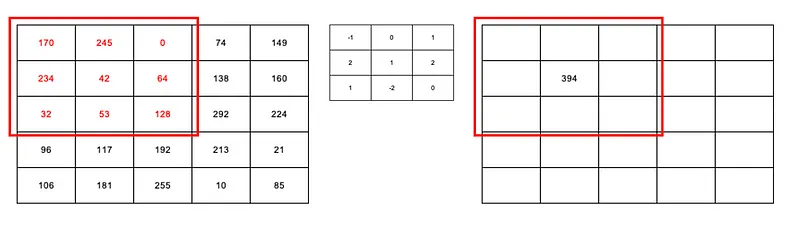

Reemplazamos el píxel central con el valor calculado. Luego, movemos el kernel uno por uno (de arriba a la izquierda a abajo a la derecha) y hacemos los cálculos nuevamente.

Usamos relleno nuevamente para los píxeles del borde.

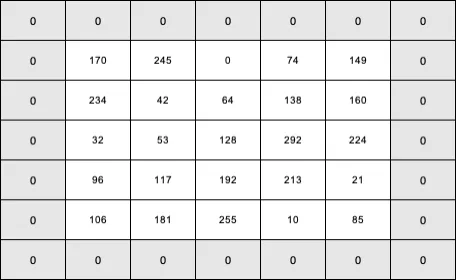

# Filtros


La versatilidad de los filtros de imágenes cobra vida a través de su variedad de operaciones. Cada operación tiene un propósito distinto, moldeando la estética de la imagen o facilitando un análisis más profundo.

Filtros de suavizado

Filtros de afilado

Filtros de mejora de bordes

## Blurring

**Filtro de suavizado (Blurring)**
 Los kernel o filtros se pueden utilizar para realizar operaciones matemáticas en cada píxel de una imagen para lograr el efecto deseado (como desenfocar o enfocar una imagen). Pero ¿por qué querrías desenfocar una imagen? Aquí hay dos razones importantes:

Porque reduce ciertos tipos de ruido en una imagen. Por esta razón, a la difuminación se le suele denominar suavizado.
Para eliminar un fondo que distraiga, puede desenfocar intencionalmente partes de una imagen, como se hace en el modo 'Retrato', en las cámaras de los dispositivos móviles.





**Filtro Promedio**
* 	Reemplazar el valor de un pixel por el promedio de los niveles de grises de los vecinos,  reduce las transiciones abruptas o muy marcadas de los niveles de grises.
* Transiciones fuertes:
  * Ruido aleatorio en una imagen (dada su naturaleza de “sharp” entre niveles de gris)
  * 	Bordes de los objetos en la imagen también son caracterizados por transiciones
“sharp” de intensidad.

 Por lo tanto, el suavizado reduce ruidos (deseable) y difumina los bordes (indeseable)

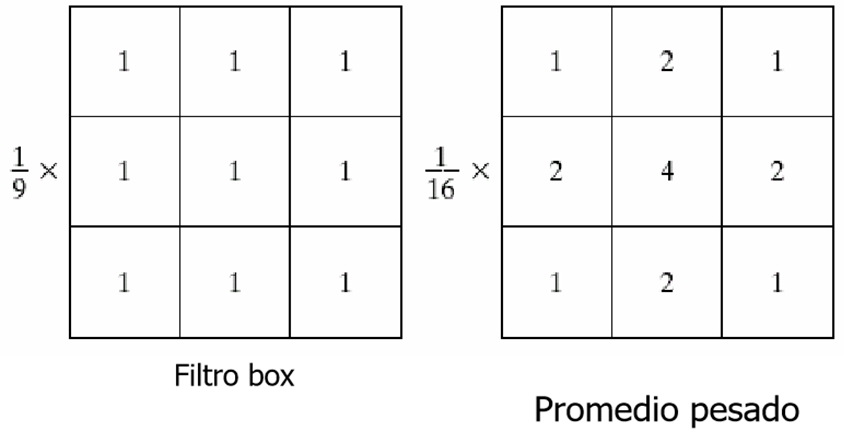

El promedio pesado es el mismo gaussiano

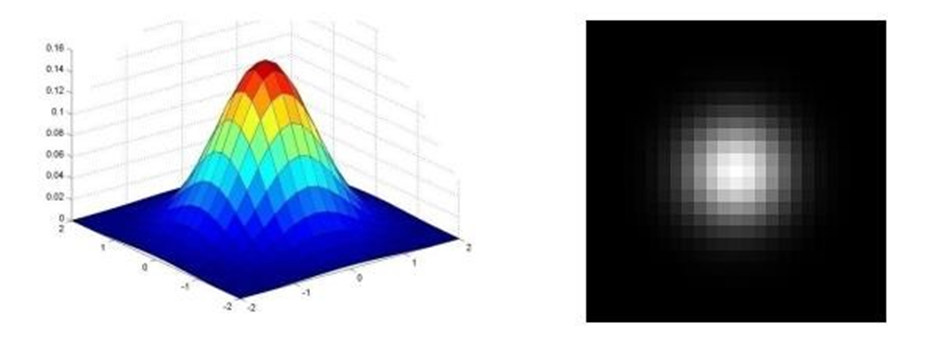



```
GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]])
```


GaussianBlur() requiere cuatro argumentos de entrada:

El primer argumento, src especifica la imagen de origen que desea filtrar.
El segundo argumento es ksize, que define el tamaño del núcleo gaussiano. Aquí, estamos usando un kernel de 5×5.
Los dos últimos argumentos son sigmaXy sigmaY, ambos establecidos en 0. Estas son las desviaciones estándar del núcleo gaussiano, en la dirección X (horizontal) e Y (vertical). La configuración predeterminada sigmaYes cero. Si simplemente lo establece sigmaXen cero, las desviaciones estándar se calculan a partir del tamaño del núcleo (ancho y alto respectivamente). También puede establecer explícitamente el tamaño de cada argumento en valores positivos mayores que cero.

se utiliza principalmente para reducir el ruido y eliminar valores atípicos o "outliers" en una imagen. A diferencia de otros filtros de convolución, como el filtro de promedio, que reemplazan el valor de un píxel por el promedio de los valores vecinos, el filtro de mediana reemplaza el valor del píxel por el valor mediano de los píxeles en su vecindario. Esto hace que la convolución con la mediana sea especialmente útil para preservar los bordes y los detalles en una imagen mientras se elimina el ruido.

# Sharpening

Sirve para resaltar transiciones de intensidad. (Bordes).

Mejorar detalles que han sufrido "blurring"

Es análogo a diferenciación espacial

Blurring es análogo a integración espacial

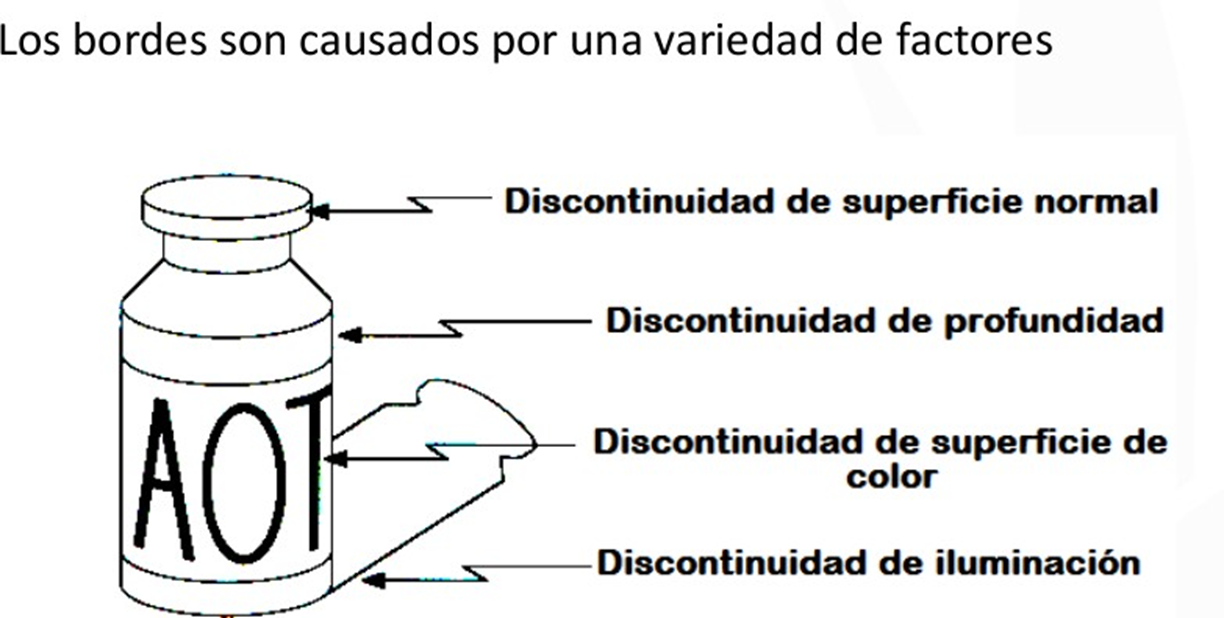

La extracción de bordes o **sharpenning** busca lo opuesto al suavizado, es decir que busca resaltar discontinuidades

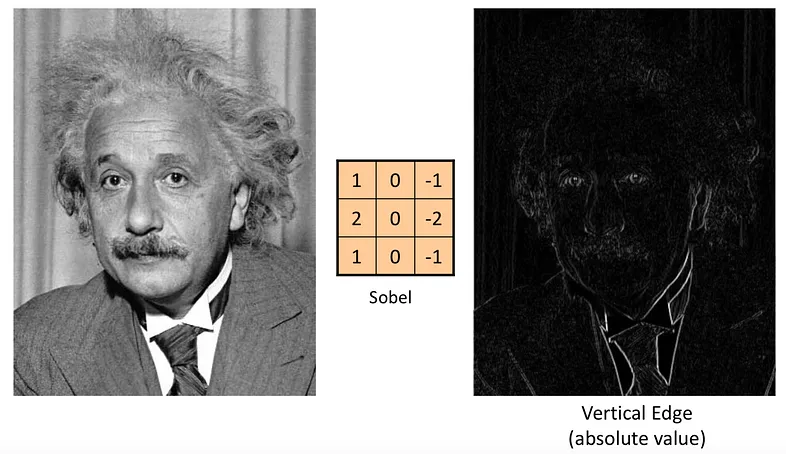

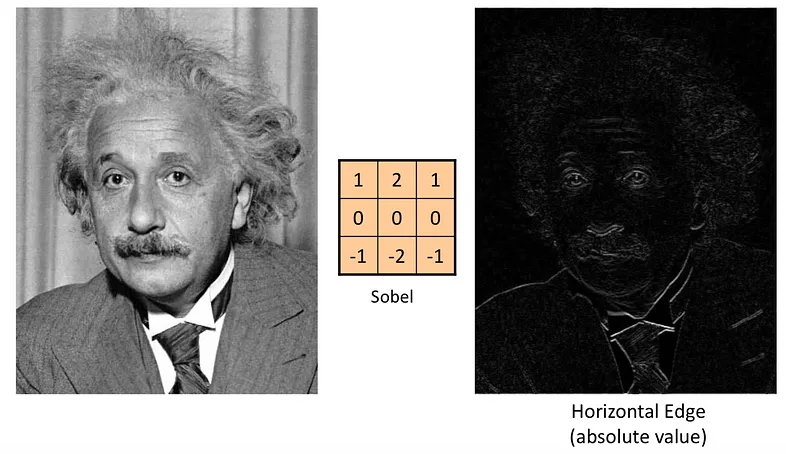

**Filtros Laplacianos**

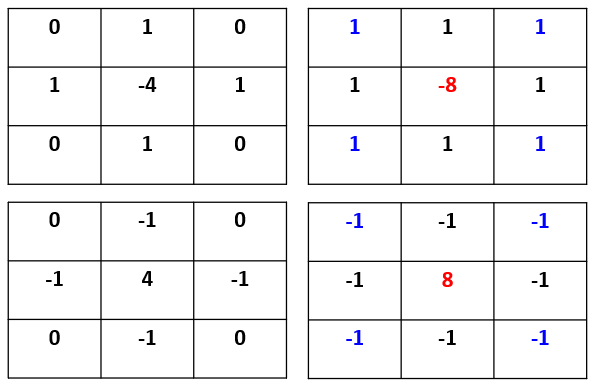

[[ 0  1  0]
 [ 1 -4  1]
 [ 0  1  0]]


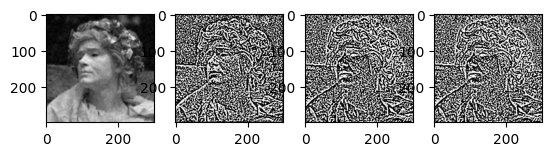

In [ ]:
#comparando laplacianos (formateo de datos)
lapla = np.array([[0,1,0],[1,-4,1],[0,1,0]])
imagen_lapla = np.zeros_like(gblur)
print(lapla)
for f in range(1, gblur.shape[0]-1):
  for c in range(1,gblur.shape[1]-1):
    matriz = gblur[f-1:f+2,c-1:c+2]
    imagen_lapla[f,c] = np.sum(np.multiply(matriz, lapla))

imagen_lapla1 = cv.filter2D(gblur,-1,lapla)
imagen_lapla2 = cv.Laplacian(gblur,cv.CV_64F)
plt.subplot(1,4,1), plt.imshow(gblur, 'gray')
plt.subplot(1,4,2), plt.imshow(imagen_lapla, 'gray')
plt.subplot(1,4,3), plt.imshow((imagen_lapla1*255).astype(np.uint8), 'gray')
plt.subplot(1,4,4), plt.imshow((imagen_lapla2*255).astype(np.uint8), 'gray')
plt.show()

En open cv la convolución se realiza con la función cv2.filter2D

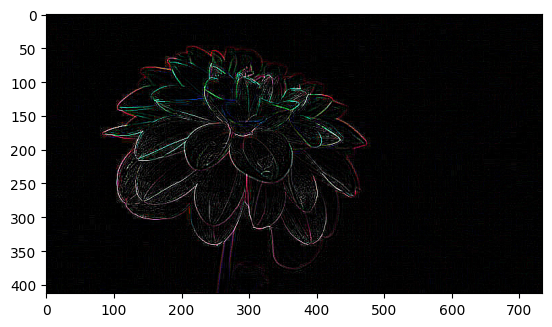

In [ ]:
#Convolución en imágen a color
#Matriz de kernel laplaciano

#Convolución entre la imágen  y el kernel, el -1 se refiere a que convolucione todos
#los canales de la imágen.

plt.figure()
plt.imshow(convolucion)
plt.show()

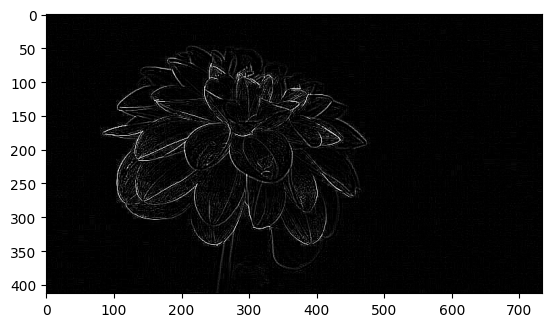

In [ ]:
#Convolución en escala de grises


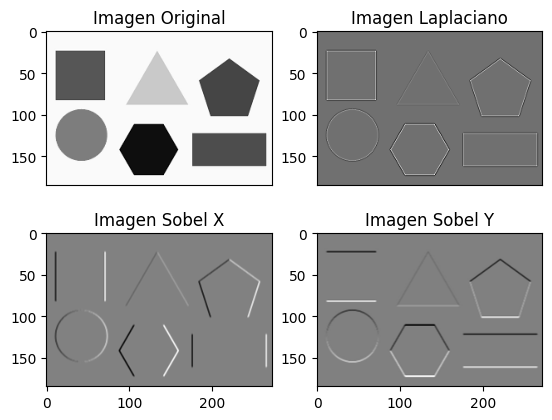

In [ ]:
from matplotlib import pyplot as plt

plt.subplot(2,2,1), plt.imshow(geogris,cmap='gray')
plt.title('Imagen Original'), plt.xticks([])
plt.subplot(2,2,3), plt.imshow(sobelX,cmap='gray')
plt.title('Imagen Sobel X')
plt.subplot(2,2,4), plt.imshow(sobelY,cmap='gray')
plt.title('Imagen Sobel Y')
plt.subplot(2,2,2), plt.imshow(Lap,cmap='gray')
plt.title('Imagen Laplaciano'),plt.xticks([])
plt.show()


# LEER DETECCIÓN DE BORDES CON CANNY
